# AFCS Assignment 1

In [1]:
library(fpp2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──
✔ ggplot2   3.1.1     ✔ fma       2.4  
✔ forecast  8.13      ✔ expsmooth 2.3  



In [2]:
library(urca)
library("IRdisplay")

In [3]:
options(repr.plot.res = 75)

## Exercise 1.5

### A)

#### wmurders

Annual female murder rate (per 100,000 standard population) in the USA. 1950-2004.
Description
Total Murdered women, per 100 000 standard population.

Format
Annual time series of class ts.

Source
Gapminder Foundation.

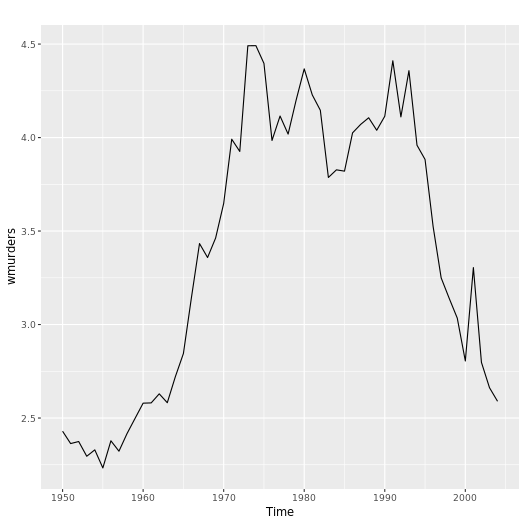

In [4]:
autoplot(wmurders)

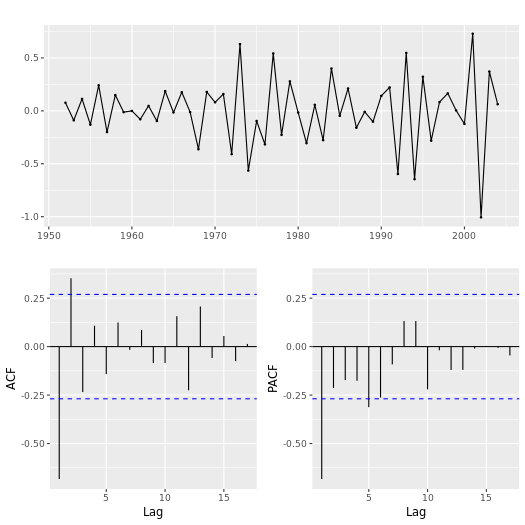

In [5]:
wmurders %>% diff() %>% diff() %>%
  ggtsdisplay()

### a.1) 
By studying appropriate graphs of the series in R, find an appropriate ARIMA(p, d, q) model for these data.

The appropriate ARIMA model is 1,1,1 for p,d,q, respectively.

- AR(0) is appropriate as there is no exponential decay in ACF
- D(2) is appropriate as 2 differences are required to quickly reduce ACF, D(1) has ACF decay too slowly
- MA(1) is appropriate as there is a single significant spike in ACF and there is an element of expoential decay in PACF



### a.2)
Should you include a constant in the model? Explain.

In this case no constant is required as d=2. Adding a constant would create a higher order trend which could be dangerous to the forecast accuracy.

### a.3)
Write this model in terms of the backshift operator.



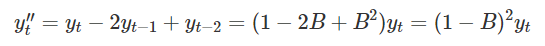

In [6]:
display_png(file="data/backshift.png")

### a.4)
Fit the model using R and examine the residuals. Is the model satisfactory?

Yes the model is satisfactory. Test of residuals show a normal distribution, both graphically and with the Ljung-Box test

In [7]:
(fit <- Arima(wmurders, order=c(0,2,1)))

Series: wmurders 
ARIMA(0,2,1) 

Coefficients:
          ma1
      -0.8995
s.e.   0.0669

sigma^2 estimated as 0.04747:  log likelihood=5.24
AIC=-6.48   AICc=-6.24   BIC=-2.54


	Ljung-Box test

data:  Residuals from ARIMA(0,2,1)
Q* = 13.04, df = 9, p-value = 0.1608

Model df: 1.   Total lags used: 10



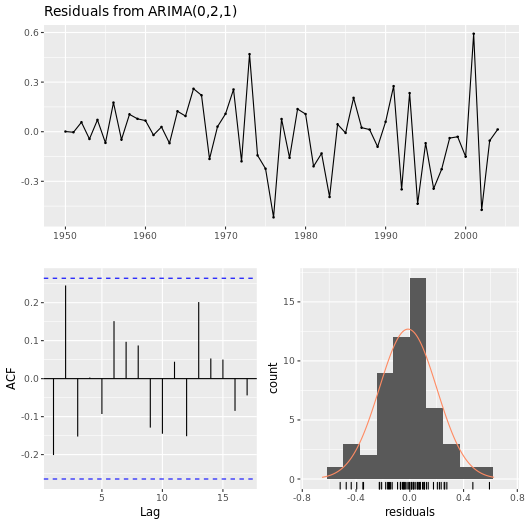

In [8]:
checkresiduals(fit)

### a.5)
Forecast three times ahead. Check your forecasts by hand to make sure that you know how they have been calculated.

In [14]:
forecast(fit,h=3)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005       2.504087 2.224876 2.783299 2.077070 2.931105
2006       2.418792 2.003603 2.833981 1.783815 3.053769
2007       2.333496 1.799788 2.867204 1.517260 3.149732

### a.6)
Create a plot of the series with forecasts and prediction intervals for the next three periods shown.

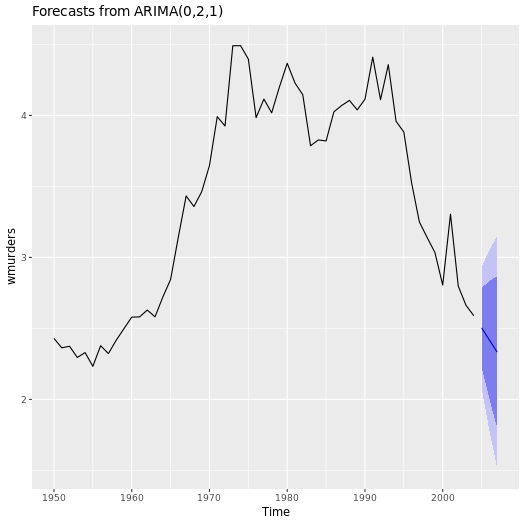

In [13]:
autoplot(forecast(fit,h=3))

### a.7)
Does auto.arima() give the same model you have chosen? If not, which model do you think is better?

Auto Arima produces a similar model with ARIMA(1,2,1) but with a slightly lower AICc score of -6.39 vs -6.24 for the initial model. Therefore the Auto Arima model is slightly better.

In [10]:
auto.arima(wmurders)

Series: wmurders 
ARIMA(1,2,1) 

Coefficients:
          ar1      ma1
      -0.2434  -0.8261
s.e.   0.1553   0.1143

sigma^2 estimated as 0.04632:  log likelihood=6.44
AIC=-6.88   AICc=-6.39   BIC=-0.97

### B)

#### usgdp

Quarterly US GDP
Description
Quarterly US GDP. 1947:1 - 2006.1

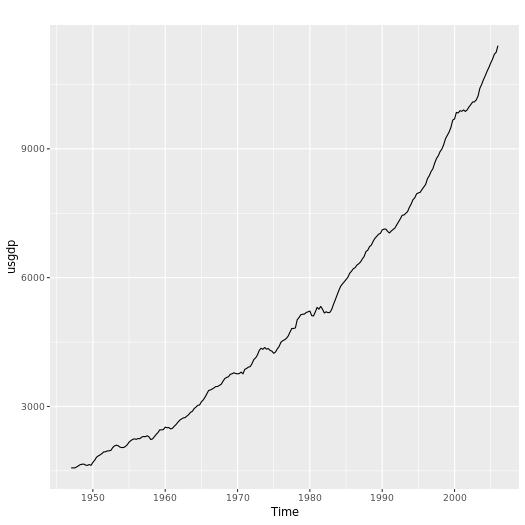

In [15]:
autoplot(usgdp)

In [26]:
(lambda <- BoxCox.lambda(usgdp))

[1] 0.366352

### b.1)
if necessary, find a suitable Box-Cox transformation for the data;

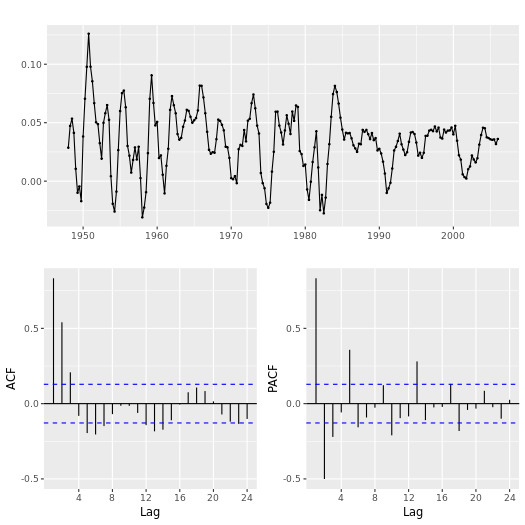

In [28]:
usgdp %>% log() %>% diff(lag=4) %>% 
    ggtsdisplay()

### b.2)
fit a suitable ARIMA model to the transformed data using auto.arima();

In [24]:
auto.arima(usgdp)

Series: usgdp 
ARIMA(2,2,2) 

Coefficients:
          ar1     ar2      ma1      ma2
      -0.1228  0.3106  -0.5835  -0.3669
s.e.   0.2869  0.0872   0.3004   0.2862

sigma^2 estimated as 1604:  log likelihood=-1199.57
AIC=2409.13   AICc=2409.39   BIC=2426.43

### b.3)
try some other plausible models by experimenting with the orders chosen;

In [31]:
(fit <- Arima(usgdp, order=c(3,2,1)))

Series: usgdp 
ARIMA(3,2,0) 

Coefficients:
          ar1      ar2      ar3
      -0.5720  -0.2394  -0.1892
s.e.   0.0644   0.0727   0.0644

sigma^2 estimated as 1805:  log likelihood=-1213.23
AIC=2434.45   AICc=2434.63   BIC=2448.29

In [38]:
(fit <- Arima(usgdp, order=c(2,2,2)))

Series: usgdp 
ARIMA(2,2,2) 

Coefficients:
          ar1     ar2      ma1      ma2
      -0.1228  0.3106  -0.5835  -0.3669
s.e.   0.2869  0.0872   0.3004   0.2862

sigma^2 estimated as 1604:  log likelihood=-1199.57
AIC=2409.13   AICc=2409.39   BIC=2426.43

### b.4)
choose what you think is the best model and check the residual diagnostics;


	Ljung-Box test

data:  Residuals from ARIMA(2,2,2)
Q* = 8.6247, df = 4, p-value = 0.0712

Model df: 4.   Total lags used: 8



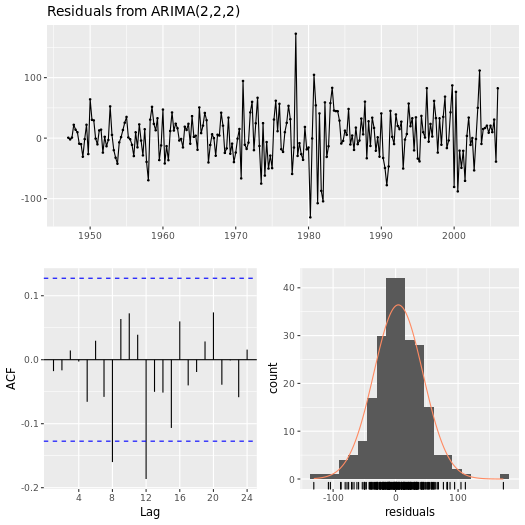

In [39]:
checkresiduals(fit)

### b.5)
produce forecasts of your fitted model. Do the forecasts look reasonable?

The forecast indeed looks reasonable

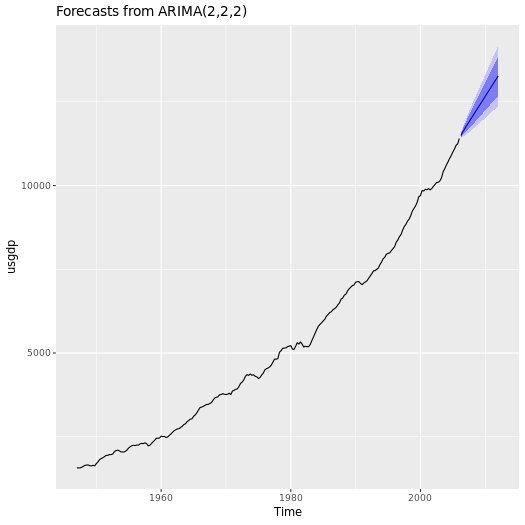

In [42]:
autoplot(forecast(fit,h=24))

### b.6)
compare the results with what you would obtain using ets() (with no transformation)

The ETS forecast has a similar trend line but wider predicition inverval compared with the Arima model

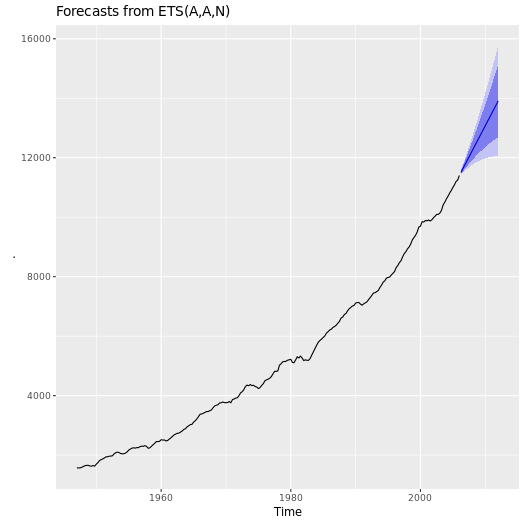

In [45]:
usgdp %>% ets() %>% forecast(h=24) %>% autoplot()

### C)

#### usmelec

Electricity monthly total net generation. January 1973 - June 2013.
Description
Electricity net generation measured in billions of kilowatt hours (kWh).

Format
Time series object of class ts.

Source
US Energy Information Administration.

### D)

#### austourists

nternational Tourists to Australia: Total visitor nights.
Description
Quarterly visitor nights (in millions) spent by international tourists to Australia. 1999-2015.

Format
Quarterly time series of class ts.

Source
Tourism Research Australia.

In [12]:
help(austourists)